<a href="https://colab.research.google.com/github/jbrun0r/graphs/blob/main/Prim_vs_Kruskal_grafos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prim vs Kruskal: Árvore Geradora Mínima em Grafos Aleatórios

Um dos problemas fundamentais relacionados a grafos é a busca pela árvore geradora mínima, um subconjunto de arestas que conecta todos os vértices do grafo, minimizando a soma dos pesos das arestas escolhidas. Neste contexto, propomos a criação de um algoritmo capaz de gerar grafos conexos aleatórios em larga escala.

O objetivo desta análise é comparar os tempos de execução dos algoritmos de Prim e Kruskal na busca pela árvore geradora mínima nos grafos gerados aleatoriamente. Ambos os algoritmos são amplamente utilizados e oferecem diferentes abordagens para resolver o mesmo problema. Ao compreender o desempenho relativo desses algoritmos, podemos ganhar insights valiosos sobre suas eficiências e aplicabilidades em cenários específicos.



In [ ]:
import time
import random
import networkx as nx
import matplotlib.pyplot as plt

A função `generate_random_connected_graph` utiliza a biblioteca NetworkX para criar um grafo aleatório conectado, baseado no modelo de Watts-Strogatz. O grafo gerado possui um número especificado de nós e arestas, sendo configurado com uma topologia que mantém uma conectividade global, mas introduz aleatoriedade local. O parâmetro $k$ determina o número de vizinhos mais próximos para cada nó inicial, influenciando a estrutura do grafo. A probabilidade de reconexão ($p$) é fixada em 0.1, proporcionando um equilíbrio entre regularidade e aleatoriedade. Além disso, pesos aleatórios são atribuídos às arestas, variando de 1 a 10.


O modelo de Watts-Strogatz, proposto pelos físicos Duncan J. Watts e Steven H. Strogatz em 1998, é uma abordagem para gerar grafos complexos que equilibram a regularidade local com a aleatoriedade global. Esse modelo se tornou significativo na compreensão das propriedades estruturais de redes complexas, incluindo redes sociais, redes biológicas e sistemas de transporte.

O processo de construção do modelo ocorre da seguinte forma:

* Regularidade Inicial (Regular Lattice): Inicialmente, um anel regular é criado, no qual cada nó é conectado aos seus k vizinhos mais próximos (com k sendo um parâmetro). Esse tipo de estrutura gera uma rede altamente regular e previsível.

* Reconexão Aleatória (Random Rewiring): Com uma probabilidade $p$, cada aresta do grafo é "reescolhida" aleatoriamente, reconectando um dos seus extremos a um nó escolhido ao acaso. Esse processo de reconexão introduz aleatoriedade no grafo e é crucial para criar uma rede com propriedades de mundo real, como curtos caminhos médios.

In [ ]:
def generate_random_connected_graph(nodes, edges):
    """
    Gera um grafo aleatório conectado usando o modelo de Watts-Strogatz.

    Parâmetros:
    - nodes (int): Número de nós no grafo.
    - edges (int): Número de arestas no grafo.

    Retorna:
    - G (Graph): Grafo conectado aleatório gerado.
    """
    k = min(10, nodes - 1)

    G = nx.connected_watts_strogatz_graph(nodes, k, p=0.1)
    for (u, v, w) in G.edges(data=True):
        w['weight'] = random.randint(1, 10)
    return G

O trecho de código apresenta a geração de um grafo conectado aleatório utilizando o modelo Watts-Strogatz. Aqui, está sendo criada uma rede com 1000 nós (nodes) e 3000 arestas (edges), sendo essencialmente um grafo complexo que visa equilibrar a regularidade local com a aleatoriedade global. A função generate_random_connected_graph implementa o modelo Watts-Strogatz, onde inicialmente um anel regular é formado, conectando cada nó aos seus vizinhos mais próximos. Posteriormente, algumas arestas são reconectadas aleatoriamente, introduzindo um elemento de aleatoriedade no grafo. Esse tipo de construção é valioso para a simulação de redes do mundo real, proporcionando uma estrutura que exibe características importantes, como pequenos caminhos médios entre os nós, influenciando a rápida disseminação de informações na rede resultante. O código ilustra o processo de criação de um grafo conectado aleatório com parâmetros específicos de nós e arestas.

In [ ]:
num_nodes = 1000
num_edges = 3000

random_connected_graph = generate_random_connected_graph(num_nodes, num_edges)

## Grafo Conectado Aleatório (Modelo Watts-Strogatz)

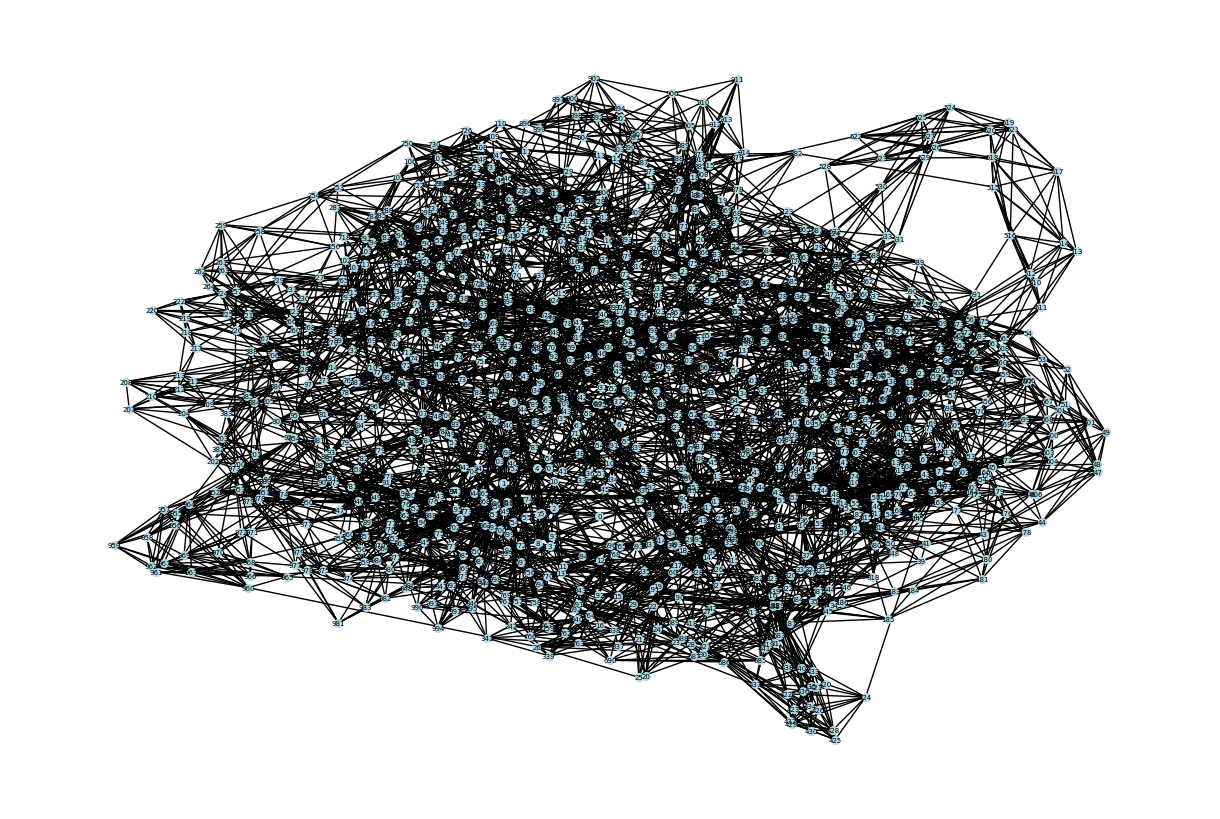

In [ ]:
pos = nx.spring_layout(random_connected_graph)
plt.figure(figsize=(12, 8))
nx.draw(random_connected_graph, pos, with_labels=True, font_size=5, node_size=30, node_color='lightblue')
plt.show()

Esta função realiza uma comparação entre os tempos de execução dos algoritmos de Prim e Kruskal para encontrar a árvore geradora mínima de um determinado grafo. O algoritmo de Prim, implementado através da função `nx.minimum_spanning_tree`, utiliza a estratégia de adicionar a borda de peso mínimo conectada ao conjunto já escolhido. Similarmente, o algoritmo de Kruskal, operando através da função `nx.minimum_spanning_tree` com o argumento `algorithm='kruskal'`, realiza o mesmo procedimento, escolhendo bordas mínimas em relação ao peso total. A função retorna as árvores geradoras mínimas obtidas por cada algoritmo, juntamente com seus respectivos tempos de execução. Essa análise comparativa oferece insights valiosos sobre o desempenho relativo desses algoritmos em um contexto específico.


In [ ]:
def compare_prim_kruskal(graph):
    """
    Compara os tempos de execução dos algoritmos de Prim e Kruskal para encontrar a árvore geradora mínima de um grafo.

    Parâmetros:
    - graph: Um grafo conectado.

    Retorna:
    - prim_tree: Árvore geradora mínima encontrada pelo algoritmo de Prim.
    - prim_time: Tempo de execução do algoritmo de Prim.
    - kruskal_tree: Árvore geradora mínima encontrada pelo algoritmo de Kruskal.
    - kruskal_time: Tempo de execução do algoritmo de Kruskal.
    """
    start_time = time.time()
    prim_tree = nx.minimum_spanning_tree(graph, algorithm='prim')
    prim_time = time.time() - start_time

    start_time = time.time()
    kruskal_tree = nx.minimum_spanning_tree(graph, algorithm='kruskal')
    kruskal_time = time.time() - start_time

    return prim_tree, prim_time, kruskal_tree, kruskal_time

**Resultados da Comparação entre Prim e Kruskal:**

O trecho de código `prim_tree, prim_time, kruskal_tree, kruskal_time = compare_prim_kruskal(random_connected_graph)` aplica os algoritmos de Prim e Kruskal no grafo `random_connected_graph` e armazena as árvores geradoras mínimas encontradas (`prim_tree` e `kruskal_tree`) e seus respectivos tempos de execução (`prim_time` e `kruskal_time`).


In [ ]:
prim_tree, prim_time, kruskal_tree, kruskal_time = compare_prim_kruskal(random_connected_graph)

### Complexidade Temporal:

**Prim:**
- $(O((V + E) \log V))$ - onde $(V)$ é o número de vértices e $(E)$ é o número de arestas. Este é o caso quando o grafo não é denso, pois $(E)$ será proporcional a $(V^2)$, e a complexidade dominante será $(\log V)$.
- Não existe melhor ou pior caso, pois o algoritmo usa uma fila de prioridade binária.

**Kruskal:**
- Pior Caso: $(O(E \log E))$ - onde $(E)$ é o número de arestas. A complexidade é dominada pela ordenação das arestas.
- Melhor Caso: $(O(E \log V))$ - ocorre quando o grafo é denso, e a complexidade é dominada pela etapa de união.

### Comparação e Considerações:

**Prim:**
- **Vantagens:**
  - Eficiente para grafos esparsos.
  - Pode ser mais rápido em grafos com menor densidade de arestas.

- **Desvantagens:**
  - Dependente da implementação da fila de prioridade.
  - Pode ser mais lento em grafos densos devido à sua complexidade $(\log V)$.

**Kruskal:**
- **Vantagens:**
  - Mais eficiente em grafos densos.
  - Menos dependente da densidade de arestas.

- **Desvantagens:**
  - A necessidade de ordenar todas as arestas pode aumentar o tempo de execução em grafos mais densos.

A escolha entre Prim e Kruskal depende das características do grafo. Em geral, Prim pode ser mais eficiente em grafos esparsos, enquanto Kruskal pode ser mais adequado para grafos densos. A implementação específica e a estrutura do grafo podem influenciar a escolha do algoritmo para otimizar o desempenho.


# Árvore Geradora Mínima (Prim)

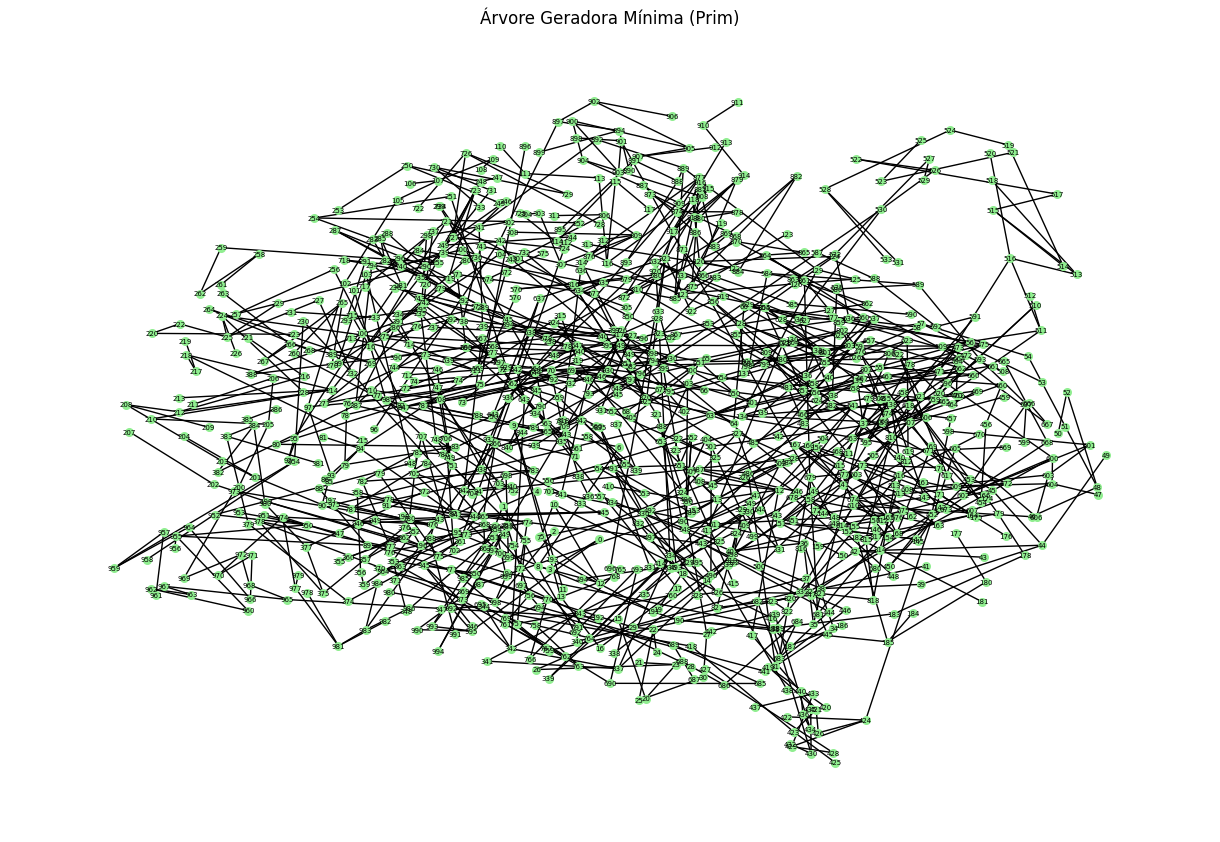

In [ ]:
plt.figure(figsize=(12, 8))
nx.draw(prim_tree, pos, with_labels=True, font_size=5, node_size=30, node_color='lightgreen')
plt.title("Árvore Geradora Mínima (Prim)")
plt.show()

# Árvore Geradora Mínima (Kruskal)

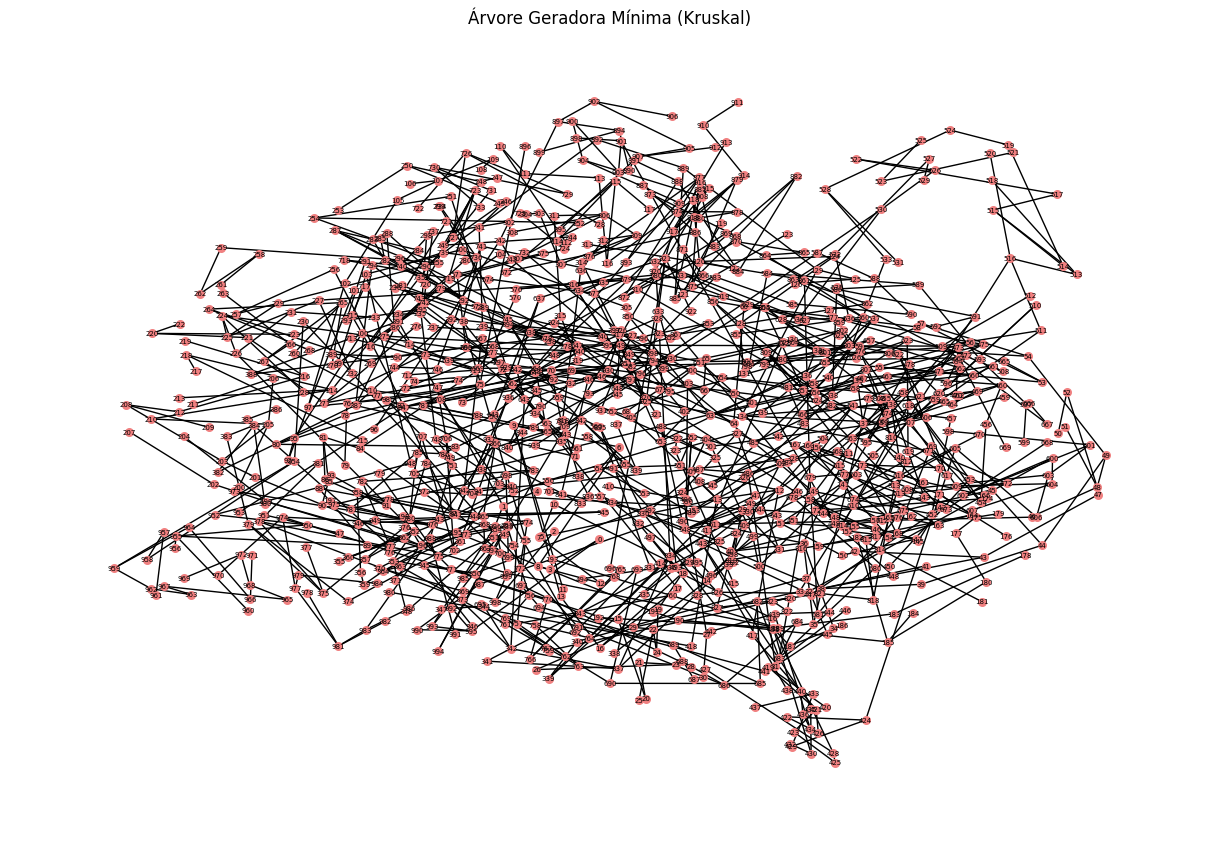

In [ ]:
plt.figure(figsize=(12, 8))
nx.draw(kruskal_tree, pos, with_labels=True, font_size=5, node_size=30, node_color='lightcoral')
plt.title("Árvore Geradora Mínima (Kruskal)")
plt.show()

In [ ]:
print(f"Tempo de execução do Prim: {prim_time} segundos")
print(f"Tempo de execução do Kruskal: {kruskal_time} segundos")

Tempo de execução do Prim: 0.023120880126953125 segundos
Tempo de execução do Kruskal: 0.01791691780090332 segundos
